# Project 1 - Comparing our Recommender engines

## Loading the results

Let's first load all the results from our different engines

In [5]:
MAE_values = {'baseline': 0.8359268356468887, 'user_based_k5': 0.7715840378428004,
             'user_based_k10': 0.7574122961878428, 'user_based_k15': 0.7559649332313403,'user_based_k20': 0.7591251066986757,
             'simpleALS': 0.8000626174884858, 'fitALS': 0.6766873800460387}

RMSE_values = {'baseline': 1.0469920398100008 , 'user_based_k5': 1.0155456710023505,
             'user_based_k10': 1.00504647861948, 'user_based_k15': 1.0095287547445164,'user_based_k20': 1.0191969468903774,
             'simpleALS': 1.0521669785652188, 'fitALS': 0.8769915812841594}

precision_values = {'baseline': 0.11008189552357478, 'user_based_k5': 0.2183151785004373,
                 'user_based_k10': 0.22266836288463068, 'user_based_k15': 0.2241591794545599,'user_based_k20': 0.22692215949749542,
                 'simpleALS': 0.21780658025922234, 'fitALS': 0.24809571286141574}

running_time_values = {'baseline': 1.0571331977844238, 'user_based_k5': 351.69897413253784,
                     'user_based_k10': 340.37679719924927, 'user_based_k15': 340.0307321548462,'user_based_k20': 362.2234880924225,
                     'simpleALS': 15.153749942779541, 'fitALS': 487.7290790081024}

## Plotting

### 1. Comparing the differents algorithms on the same dataset

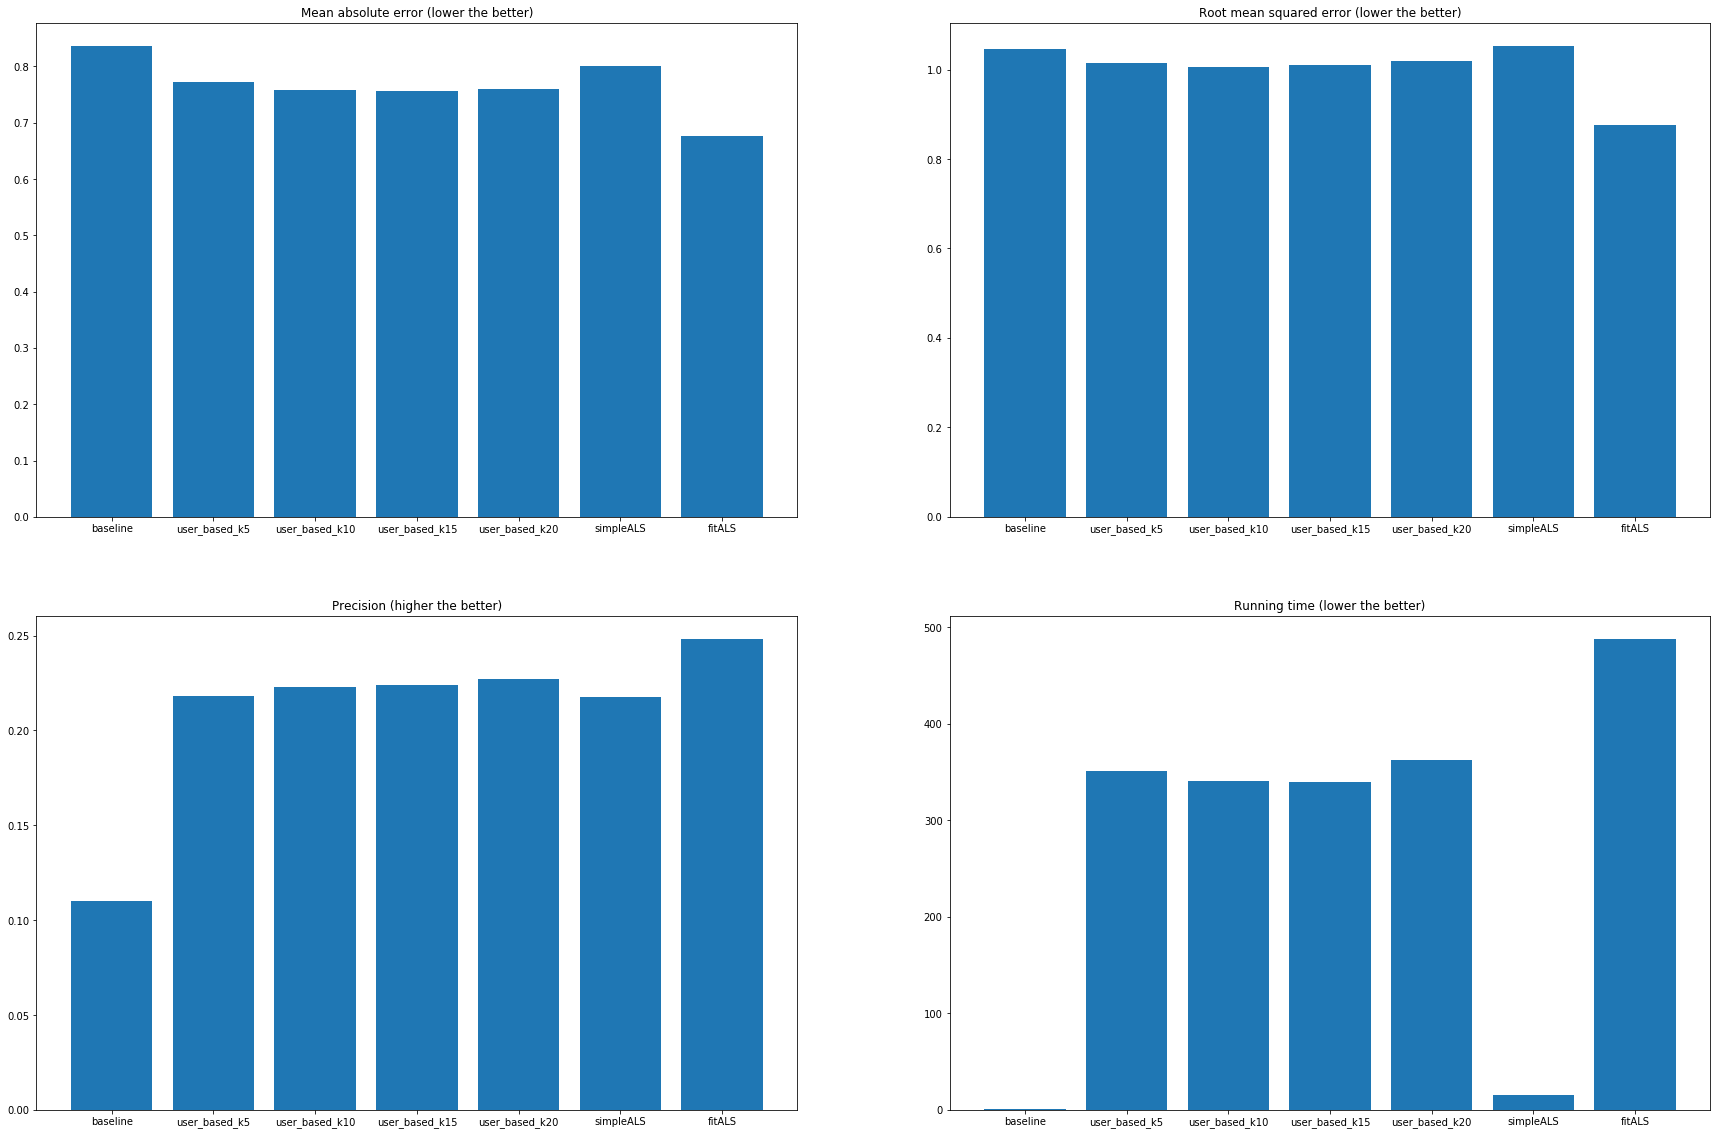

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

alg = list(MAE_values.keys())

val_mae = list(MAE_values.values())
val_rmse = list(RMSE_values.values())
val_pred = list(precision_values.values())
val_time = list(running_time_values.values())


fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs[0, 0].bar(alg, val_mae)
axs[0, 0].set_title('Mean absolute error (lower the better)')
axs[0, 1].bar(alg, val_rmse)
axs[0, 1].set_title('Root mean squared error (lower the better)')
axs[1, 0].bar(alg, val_pred)
axs[1, 0].set_title('Precision (higher the better)')
axs[1, 1].bar(alg, val_time)
axs[1, 1].set_title('Running time (lower the better)')
plt.show()



We have plotted above the performances of the seven different algorithms we created:
- a simple baseline
- 4 different user based collaborative filterings models with different neighborood sizes (5, 10, 15, 20)
- an ALS model with specific hyperparameters
- a fitted ALS model which was trained on several values of hyperparameters

### In Overall,
we see that in terms of accuracy, the best model for this specific random dataset of 2,700 movies and 10,000 users is the fitted **ALS algorithm**. Indeed, this one has the **lowest MAE and RMSE** of all, and really has a higher precision. However, the **running time is really higher**, which is important to take into consideration.

Choosing this model instead of another would mean sacrificing a lot of time to compute the ratings, which may be unappropriate for the company's needs.



### A good compromise,
would be to select one of the user based methods, as the running time are much lower and the accuracy is not that bad. This choice depends on many aspects, but we have provided insights on the advantages and flaws of our models.

### 2. Comparison of our user-based model on different sampling sizes of the dataset

In this subsection, we will keep our user based model with 10 nearest neighbors and we will try to see how it performs upon different dataset sizes.


In [9]:
MAE_values_2 = {'500 Popular': 0.7061554767318969, '1000 Popular': 0.709629915655458, 
                '1700 random': 0.7530148505994723, '2000 Popular': 0.7114360141571938, 
                '2700 random': 0.7133408505481735}

RMSE_values_2 = {'500 Popular': 0.9064556163519203, '1000 Popular': 0.9118947788296244, 
                 '1700 random': 0.9874395250459447, '2000 Popular': 0.9132074088126835, 
                 '2700 random': 0.9160241498098819}

precision_values_2 = {'500 Popular': 0.22834755841611865, '1000 Popular': 0.2285488268758205, 
                      '1700 random': 0.21819557723030353, '2000 Popular': 0.22842987190848305, 
                      '2700 random': 0.22776285840606528}

running_time_values_2 = {'500 Popular': 544.5693008899689, '1000 Popular': 767.0439291000366, 
                         '1700 random': 246.2354609966278, '2000 Popular': 910.9235987663269, 
                         '2700 random': 1499.3303899765015}

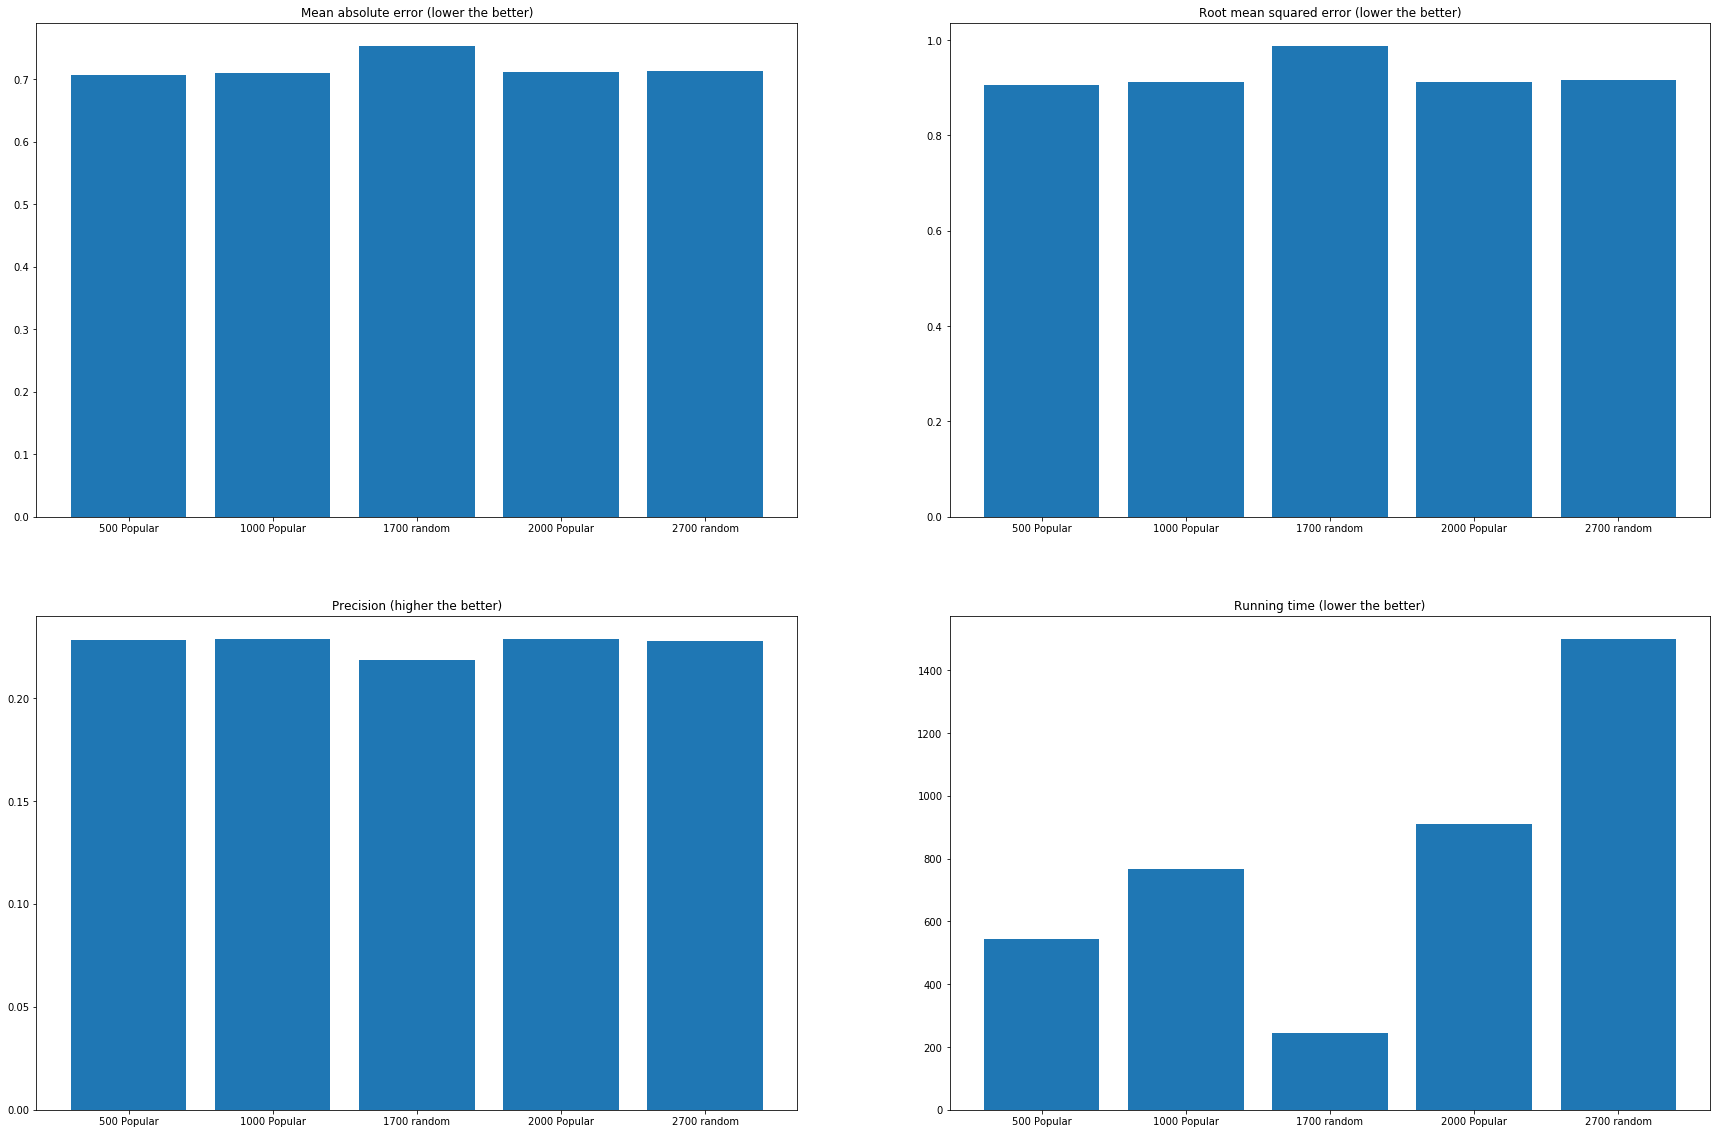

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

alg2 = list(MAE_values_2.keys())

val_mae2 = list(MAE_values_2.values())
val_rmse2 = list(RMSE_values_2.values())
val_pred2 = list(precision_values_2.values())
val_time2 = list(running_time_values_2.values())


fig2, axs2 = plt.subplots(2, 2, figsize=(30, 20))
axs2[0, 0].bar(alg2, val_mae2)
axs2[0, 0].set_title('Mean absolute error (lower the better)')
axs2[0, 1].bar(alg2, val_rmse2)
axs2[0, 1].set_title('Root mean squared error (lower the better)')
axs2[1, 0].bar(alg2, val_pred2)
axs2[1, 0].set_title('Precision (higher the better)')
axs2[1, 1].bar(alg2, val_time2)
axs2[1, 1].set_title('Running time (lower the better)')

plt.show()



This plot allows us to get informations on how our model could perform with respect to the size of the data it is given. 

- **Running time**

First of all, the easiest plot to interpret is the last one, the running time. The trend shows that the more data there is to analyze, the longer the training is. There is still one strange value in the middle, with a real reduction of the running time for 1,700 random movies. We do not have any explanations for this.

- **Accuracy: Precision, RMSE and MAE**

The accuracy does not seem to depend on the dataset size. Indeed, it is mainly constant for our 5 sizes, with a small increase for the 1,700 random movies. One explanation could be that because of the randomness of the data and its low size, it is difficult for the model to predict accurate ratings. For the 2,700 random movies, the accuracy improves as there is more information to predict ratings.
Apart from this, the accuracy remains constant. Same for the precision.

- **Conclusion**

To conclude, we can confidently say that our model will be usable on large datasets without much trouble. The only thing to keep in mind is that the larger the dataset, the longer the running time. This parameter must be taken into account when designing recommender systems, and it may be appropriate to sacrifice the accuracy of the model in order to reduce the running time. For instance, training on smaller datasets will allow good running time while decreasing the overall accuracy for the whole dataset. 

All of these results may give insights for the stakeholder to take decisions.